# Welcome to Assignment 5
There are two parts in this assignment. The conceptual questions could be answered by words, and the coding questions require some computation.

## Conceptual questions
### Q1. Suppose we want to build a connected network with 10 nodes and average degree 1.8, such that the heterogeneity parameter is largest. What does the graph look like?

hint: you don't have to use Networkx to construct a network and plot it. A simple description would do :)

As we want to keep the heterogenelity parameter to be the highest the network should have hub like structures as that is what will maximize the heterogenelty parameter. For 10 nodes and 1.8 average degree there could be 1 central hub node and all the other nodes are connected to this node. The central node will have the degree of 9 and the other nodes will have degree of 1. When we take an average this will come to (9+1+1+1+1+1+1+1+1+1)/10 = 1.8. So this should be a hub and spokes/ snowflake kind of graph.


### Q2. Are there networks such that the average number of neighbors of a node’s neighbors match the average degree? If there are, what property must they have?

For a node's neighbors to have the same average number of neighbors as the average degree, the network needs to be a fully connected homogenous network where each of the node is connected to every other node. Other option would be a network where each of the node has the same degree i.e. each node is connected to same number of nodes.

## Coding Questions

We will be using **socfb-Northwestern25** network for the following questions. You could find it in the book’s Github repository dataset folder or on Canvas. It is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. **Be sure to use the proper graph class for an undirected, unweighted network.**

In [1]:
import networkx as nx
import statistics as stats
import matplotlib.pyplot

In [2]:
UG = nx.read_edgelist('Data/socfb-Northwestern25.edges',nodetype=int, create_using = nx.Graph())

In [3]:
E = UG.number_of_edges()
N = UG.number_of_nodes()
D = nx.density(UG)
print(f'The graph has {E} edges, {N} nodes and the density is {D}')

The graph has 488337 edges, 10567 nodes and the density is 0.008747567709293077


### Q3.  What proportion of nodes have degree 100 or greater?
hint: ratio of number of nodes having degree no less than 100 divided by the total number of nodes.

In [4]:
deg = dict(UG.degree())
deg_100 = sum(int(i) >= 100 for i in deg.values())
print(f'Proportion of nodes with degree greater than or equal to 100 is {deg_100/N}')

Proportion of nodes with degree greater than or equal to 100 is 0.3821330557395666


### Q4. What is the maximum degree in this network?

In [5]:
degree_max = max(UG.nodes(),key=UG.degree())
max_deg = UG.degree(degree_max)
print("Max degree value :",max_deg)

Max degree value : 2105


### Q5. Users in this network are anonymized by giving the nodes numerical names. Which node has the highest degree?

In [6]:
print("Node with Maximum Degree:", degree_max)

Node with Maximum Degree: 8262


### Q6. What is 95th percentile for degree, i.e., the value such that 95% of nodes have this degree or less?

In [7]:
import numpy as np

degree_sequence = [UG.degree(n) for n in UG.nodes]
deg_per_95 = np.percentile(degree_sequence, 95)

print(f'95th percentile of degrees is {deg_per_95}')

95th percentile of degrees is 244.0


### Q7. Is the network assortative or disassortative?

In [8]:
assortivity = nx.degree_assortativity_coefficient(UG)
if assortivity >= 0:
    print("Network is Associative")
else:
    print("Network if Disassociative")

print(f'Assortivity co-efficient of the given network is {assortivity}')

Network is Associative
Assortivity co-efficient of the given network is 0.03444129080710951


### Q8. What is the mean degree for nodes in this network?

In [9]:
deg_mean = np.mean(degree_sequence)

print(f'Mean degrees is {round(deg_mean,3)}')

Mean degrees is 92.427


### Q9. Which of the following shapes best describes the degree distribution in this network? You can obtain the answer visually using tools we have introduced such as histograms, cumulatives, or log-scale plots.

a) Normal  
b) Poissonian  
c) Power law  
d) Exponential  

Hint: 1) At least one visualization is needed 2) select your answer from the four options based on your visualizations. 

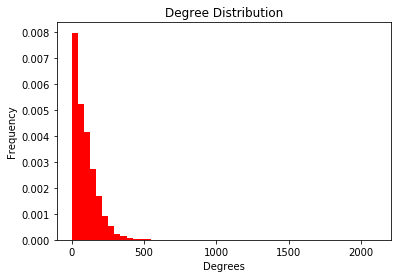

In [10]:
from matplotlib import pyplot

pyplot.hist(degree_sequence, density=True, bins = 50, color='red')
pyplot.xlabel('Degrees')
pyplot.ylabel('Frequency')
pyplot.title('Degree Distribution')

pyplot.show()

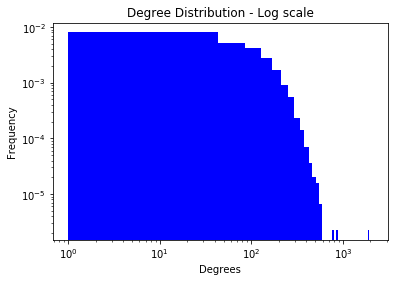

In [11]:
pyplot.hist(degree_sequence, density=True, bins = 50, color='blue')
pyplot.xlabel('Degrees')
pyplot.ylabel('Frequency')
pyplot.title('Degree Distribution - Log scale')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.show()

From the histogram the distribution seems to be either power law distribution or an exponential distribution however by looking at the log scale plot it certainly looks like it is a power law distribution.